## Race Car Project 

In [11]:
import sys
import simpy
from gym import wrappers
#import model as mod
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from descartes import PolygonPatch
import shapely.geometry as sg

NameError: name '_C' is not defined

In [2]:
sys.path.append("/Users/macbookpro/Desktop/Racecar_project")

In [3]:
#sys.path.append("C:\\Users\\Pouya\\Documents\\Deep Learning\\Project\\gym-Racecar\\gym_Racecar\\envs\\")

In [4]:
print(sys.path)

['C:\\Users\\Pouya\\Documents\\Deep Learning\\Project', 'C:\\Python38\\python38.zip', 'C:\\Python38\\DLLs', 'C:\\Python38\\lib', 'C:\\Python38', '', 'C:\\Users\\Pouya\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Python38\\lib\\site-packages', 'c:\\users\\pouya\\documents\\deep learning\\project\\gym-racecar', 'C:\\Python38\\lib\\site-packages\\win32', 'C:\\Python38\\lib\\site-packages\\win32\\lib', 'C:\\Python38\\lib\\site-packages\\Pythonwin', 'C:\\Python38\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Pouya\\.ipython', 'C:\\Users\\Pouya\\Documents\\Deep Learning\\Project\\', 'C:\\Users\\Pouya\\Documents\\Deep Learning\\Project\\gym-Racecar\\gym_Racecar\\envs\\']


In [5]:
from racetrack import racetrack
from simulation import python_env
from environment import RacecarEnv

In [6]:
from gym import envs
import gym_Racecar

# envids = [spec.id for spec in envs.registry.all()]
# for envid in sorted(envids):
#     print(envid)

In [7]:
pip install -e gym-Racecar

Obtaining file:///C:/Users/Pouya/Documents/Deep%20Learning/Project/gym-Racecar
  Attempting uninstall: gym-Racecar
    Found existing installation: gym-Racecar 0.0.1
    Uninstalling gym-Racecar-0.0.1:
      Successfully uninstalled gym-Racecar-0.0.1
  Running setup.py develop for gym-Racecar
Note: you may need to restart the kernel to use updated packages.


In [8]:
import gym
num_turns = 4
env = gym.make('RacecarEnv-v0', turns = num_turns)
# print(env.action_space)
# print(env.observation_space)

In [9]:
class PolicyNet(nn.Module):
    """Policy network"""

    def __init__(self, n_inputs, n_hidden, n_outputs, learning_rate):
        super(PolicyNet, self).__init__()
        # network
#         self.hidden = nn.Linear(n_inputs, n_hidden)
        self.hidden = nn.Linear(n_hidden, n_hidden)
        self.hidden2 = nn.Linear(n_hidden, n_hidden)
        self.out = nn.Linear(n_hidden, n_outputs)
        # training
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        self.D = nn.Dropout(p=0.6)

    def forward(self, x):
        x = self.hidden(x)
#         x = self.D(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = self.out(x)
        return F.softmax(x, dim=1)
    
    def loss(self, action_probabilities, returns):
        return -torch.mean(torch.mul(torch.log(action_probabilities), returns))

In [10]:
n_inputs = env.observation_space.shape[0]
n_hidden = 35
n_outputs = 2 #env.action_space.n

print('state shape:', n_inputs)
print('action shape:', n_outputs)

state shape: 1
action shape: 2


In [11]:
def compute_returns(rewards, discount_factor):
    """Compute discounted returns."""
    returns = np.zeros(len(rewards))
    returns[-1] = rewards[-1]
    for t in reversed(range(len(rewards)-1)):
        returns[t] = rewards[t] + discount_factor * returns[t+1]
    return returns

In [12]:
# training settings

num_episodes = 10
rollout_limit = 10 # max rollout length
discount_factor = 0.99 # reward discount factor (gamma), 1.0 = no discount
learning_rate = 0.01 # you know this by now
val_freq = 10 # validation frequency

# Policy 
policy = PolicyNet(n_inputs, n_hidden, n_outputs, learning_rate)

In [13]:
def closer(dist1, dist2):
    return dist2 < dist1

start training


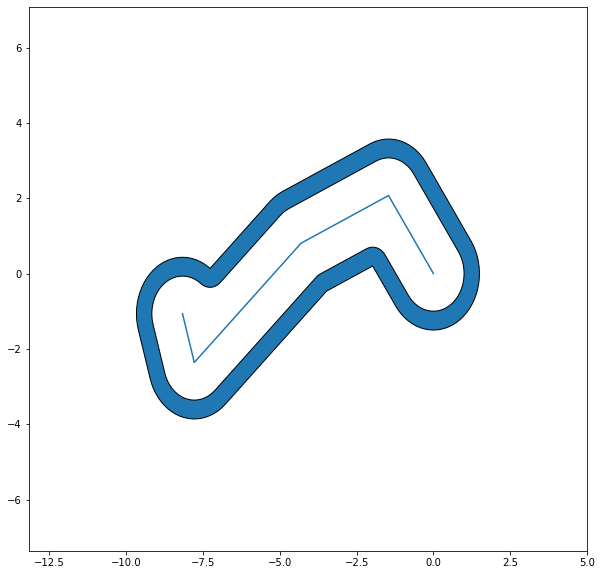

Position: ([], [], [])
Observation: Distance | Angle | Sign: 14.77724553348366 0.30821847935168434 -1
Observation: Distance | Angle | Sign: 14.678434252945976 0.17052125058909018 1
Observation: Distance | Angle | Sign: 14.58765545847144 0.652430834323297 1
Observation: Distance | Angle | Sign: 14.525675861407137 1.1369405493827838 1
Observation: Distance | Angle | Sign: 14.5068820338226 1.622842076631171 1
Observation: Distance | Angle | Sign: 14.535670264992858 2.1085707473231627 1
Observation: Distance | Angle | Sign: 14.605312813525577 2.5926067030669895 1
Observation: Distance | Angle | Sign: 14.69968708333302 3.0738606065334646 1
Observation: Distance | Angle | Sign: 14.79728344798745 2.7312670785214865 -1
Observation: Distance | Angle | Sign: 14.876257436857024 2.25609364771773 -1


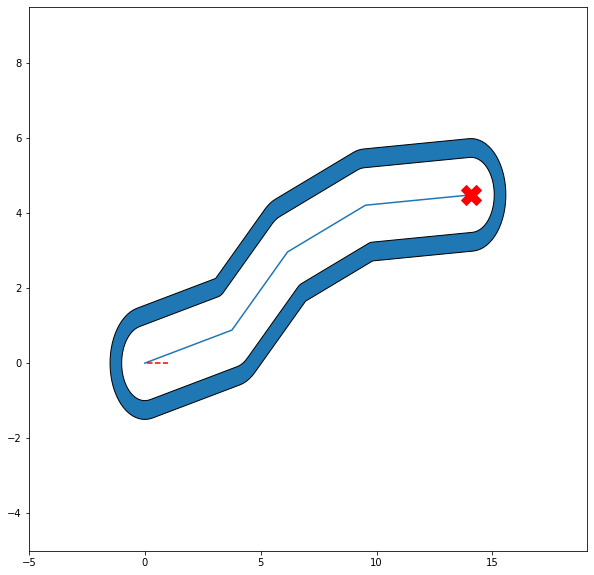

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


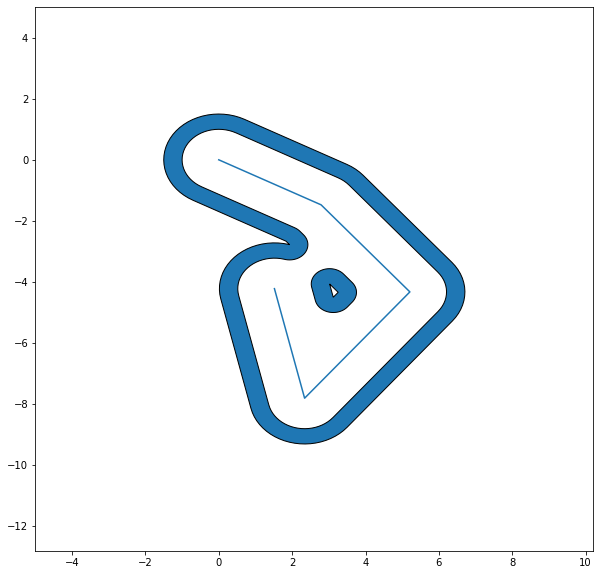

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 3.3449677943695506 0.032386103213613265 1
Observation: Distance | Angle | Sign: 3.2496718354037624 0.5197765715665147 1
Observation: Distance | Angle | Sign: 3.1785688634794846 1.0204337021174612 1
Observation: Distance | Angle | Sign: 3.1496942451152363 1.5295805172449595 1
Observation: Distance | Angle | Sign: 3.170702124382535 2.039412840570335 1
Observation: Distance | Angle | Sign: 3.2360041599836484 2.5418643789741067 1
Observation: Distance | Angle | Sign: 3.3288794804114623 3.0315518902603267 1
Observation: Distance | Angle | Sign: 3.4271191761219884 2.776164961042586 -1
Observation: Distance | Angle | Sign: 3.5090352873624093 2.313017806710878 -1
Observation: Distance | Angle | Sign: 3.557806929344096 1.8582138506093138 -1


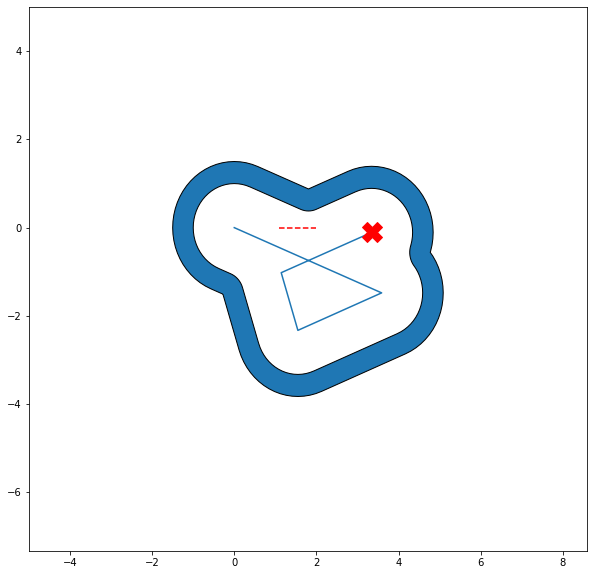

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


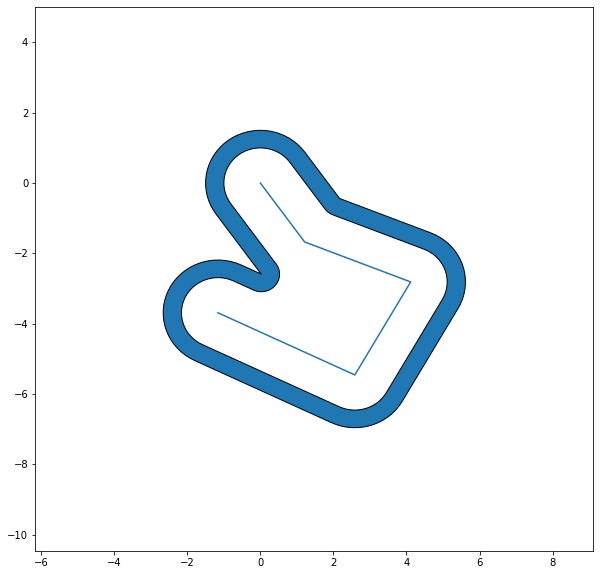

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 6.9611954335257025 0.7737169336944637 1
Observation: Distance | Angle | Sign: 6.909306628746849 1.2650843015560003 1
Observation: Distance | Angle | Sign: 6.903470842673188 1.7586030911656576 1
Observation: Distance | Angle | Sign: 6.945111633796119 2.250784180961206 1
Observation: Distance | Angle | Sign: 7.024144645523169 2.7385338092985547 1
Observation: Distance | Angle | Sign: 7.121888583343621 3.0631859810118116 -1
Observation: Distance | Angle | Sign: 7.216034825982713 2.5882753343623355 -1
Observation: Distance | Angle | Sign: 7.285883888272429 2.118757693543299 -1
Observation: Distance | Angle | Sign: 7.316552666989819 1.6524543972280394 -1
Observation: Distance | Angle | Sign: 7.301629188522066 1.1866484855737136 -1


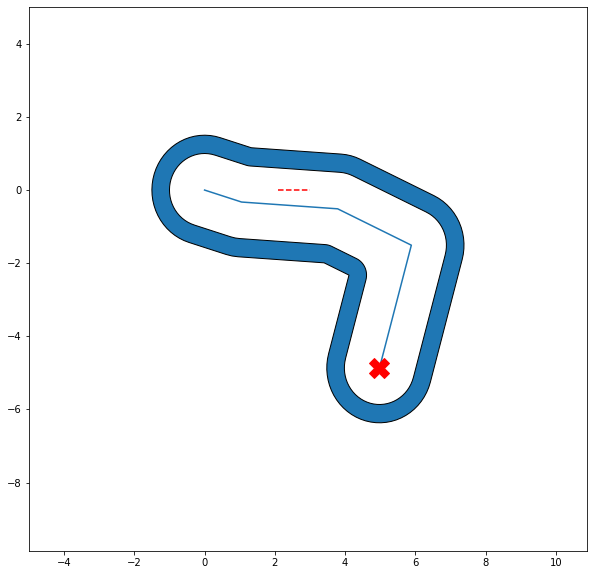

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


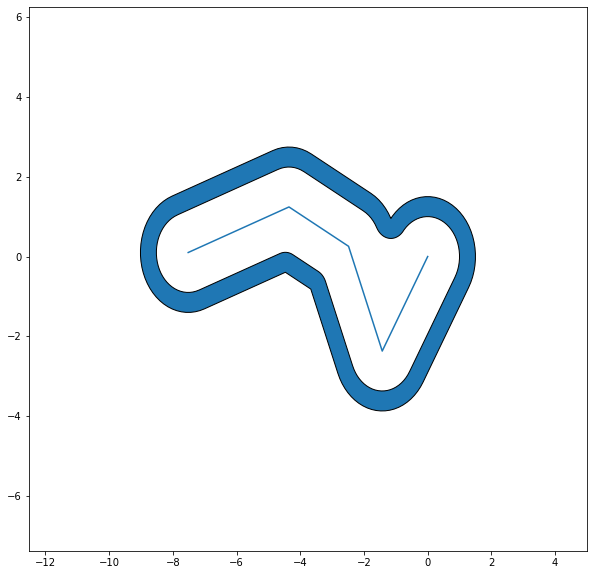

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 9.634952162621898 0.19026427269115814 -1
Observation: Distance | Angle | Sign: 9.536028004039117 0.28945033403266307 1
Observation: Distance | Angle | Sign: 9.45065523573849 0.7739423098267767 1
Observation: Distance | Angle | Sign: 9.398650066985049 1.2620887911649221 1
Observation: Distance | Angle | Sign: 9.392330575267966 1.7518115963678496 1
Observation: Distance | Angle | Sign: 9.433206624262132 2.2405986475827553 1
Observation: Distance | Angle | Sign: 9.511562036288819 2.7261970365893853 1
Observation: Distance | Angle | Sign: 9.609097075454827 3.0759832072742483 -1
Observation: Distance | Angle | Sign: 9.703611111419066 2.5998480146517084 -1
Observation: Distance | Angle | Sign: 9.774179282601391 2.127782017812117 -1


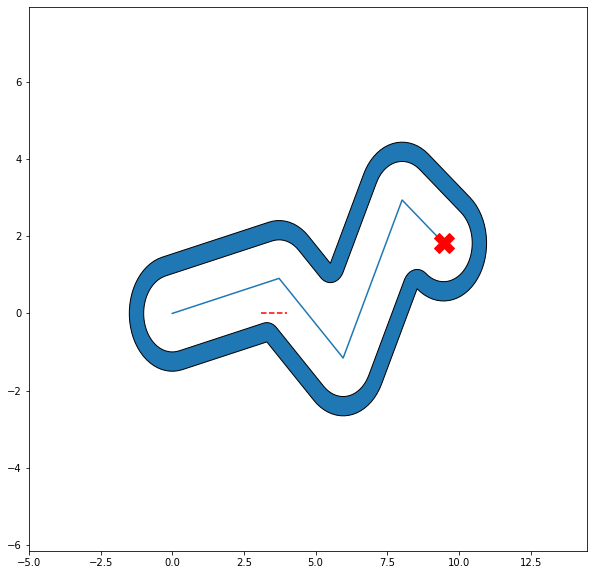

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


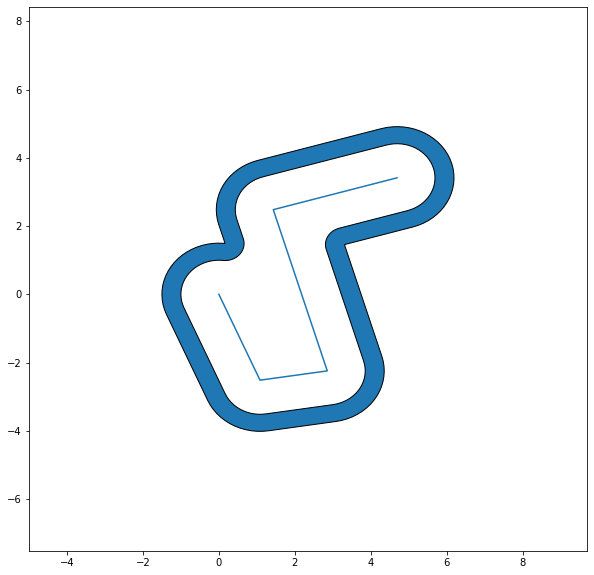

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 2.2657888176217575 2.344046165885406 1
Observation: Distance | Angle | Sign: 2.35039896715782 2.8455612001887274 1
Observation: Distance | Angle | Sign: 2.449293610269309 2.9561409798976954 -1
Observation: Distance | Angle | Sign: 2.539854554040491 2.493020321596281 -1
Observation: Distance | Angle | Sign: 2.603470267141361 2.043341219320565 -1
Observation: Distance | Angle | Sign: 2.6281018210856075 1.6008164234560711 -1
Observation: Distance | Angle | Sign: 2.609294386502028 1.1587508661348025 -1
Observation: Distance | Angle | Sign: 2.550439455338895 0.7104304497041039 -1
Observation: Distance | Angle | Sign: 2.462580378355372 0.24947407636105012 -1
Observation: Distance | Angle | Sign: 2.363539477235063 0.22931457624017426 -1


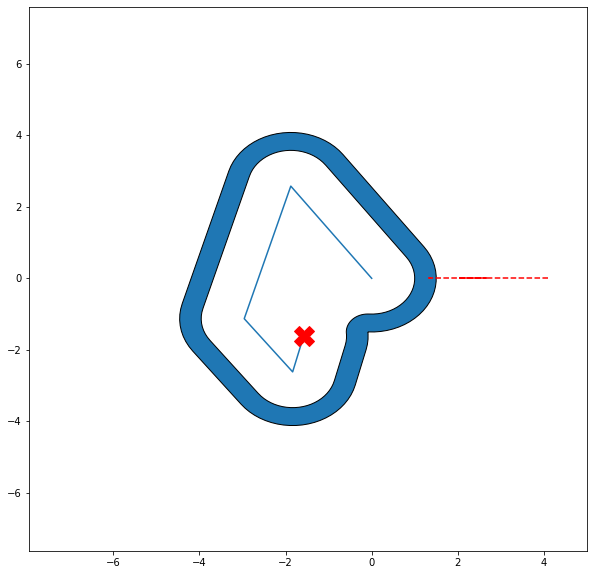

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


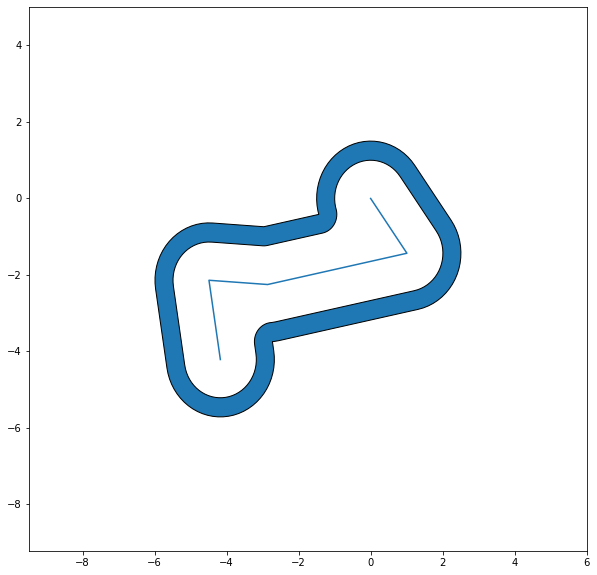

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 12.313358190111334 2.079720222571307 1
Observation: Distance | Angle | Sign: 12.380977458579311 2.5647840686157632 1
Observation: Distance | Angle | Sign: 12.474488390605785 3.0466133817366927 1
Observation: Distance | Angle | Sign: 12.572508431000246 2.7585049095314886 -1
Observation: Distance | Angle | Sign: 12.6530966038665 2.2838678909662455 -1
Observation: Distance | Angle | Sign: 12.698565292909448 1.8116072997915147 -1
Observation: Distance | Angle | Sign: 12.699071374938445 1.3402044588120718 -1
Observation: Distance | Angle | Sign: 12.654505838511255 0.8679796966801296 -1
Observation: Distance | Angle | Sign: 12.574514281161656 0.3934075385664233 -1
Observation: Distance | Angle | Sign: 12.47664680477811 0.0845786537340576 -1


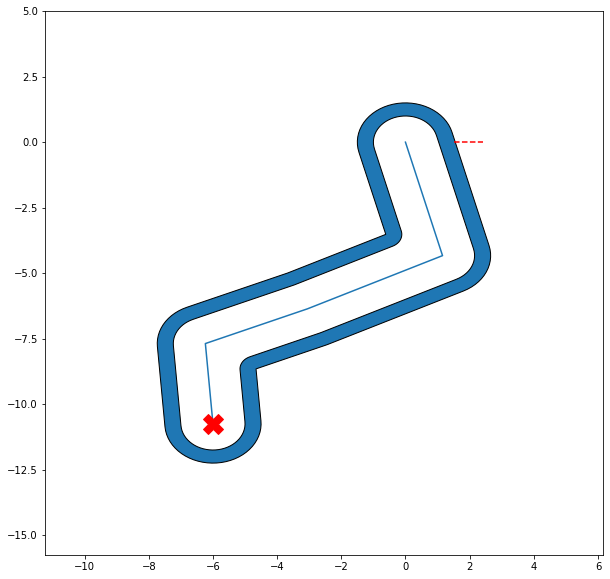

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


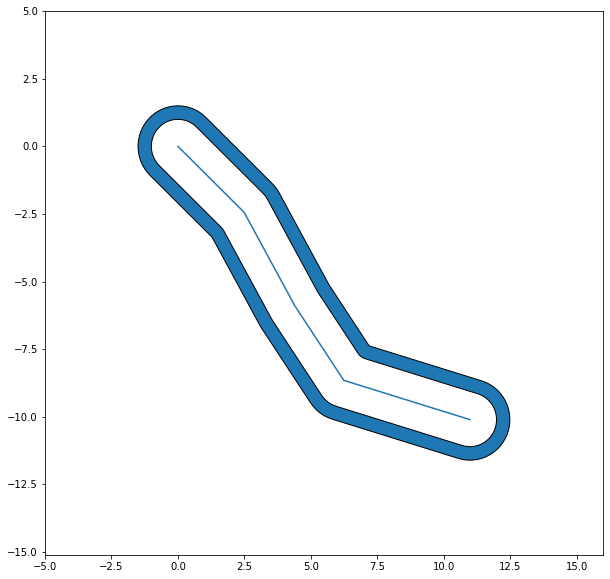

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 8.224447243181713 1.7948465023971938 -1
Observation: Distance | Angle | Sign: 8.22350338509008 1.3276872103556976 -1
Observation: Distance | Angle | Sign: 8.177998663037314 0.8592124747578477 -1
Observation: Distance | Angle | Sign: 8.09756922984807 0.38711325583069933 -1
Observation: Distance | Angle | Sign: 7.999612202750359 0.09026933917304691 1
Observation: Distance | Angle | Sign: 7.905971501709024 0.5735298003495686 1
Observation: Distance | Angle | Sign: 7.838234677335221 1.061911817762402 1
Observation: Distance | Angle | Sign: 7.812467866129167 1.553335540368803 1
Observation: Distance | Angle | Sign: 7.834885147373131 2.044869257350638 1
Observation: Distance | Angle | Sign: 7.90007699717556 2.5335495247935795 1


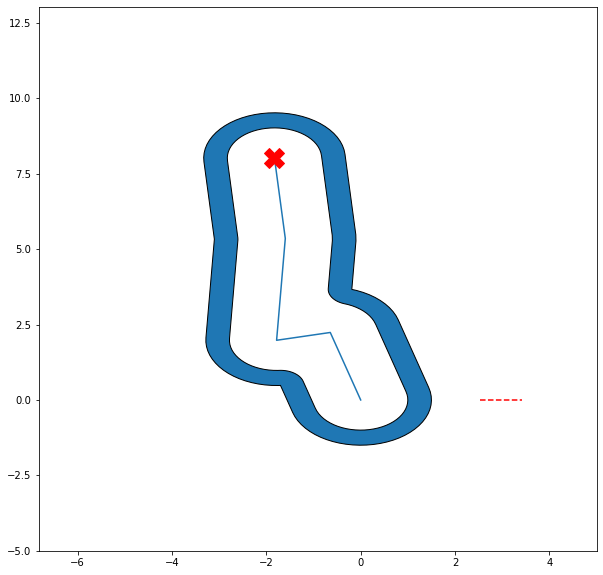

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


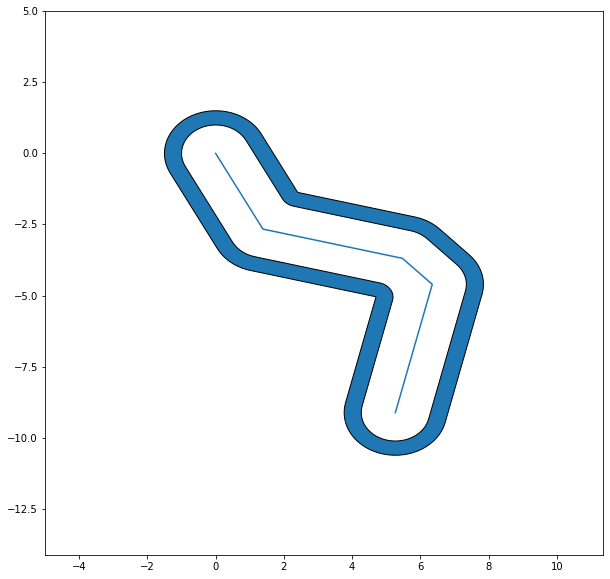

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 6.8376446364085215 1.5441484609396938 1
Observation: Distance | Angle | Sign: 6.859260929846065 2.0374648651045404 1
Observation: Distance | Angle | Sign: 6.923951816118938 2.5275503988320356 1
Observation: Distance | Angle | Sign: 7.016228594552852 3.0119160118934545 1
Observation: Distance | Angle | Sign: 7.114685018458457 2.7935941357604284 -1
Observation: Distance | Angle | Sign: 7.197327787846389 2.322020718419103 -1
Observation: Distance | Angle | Sign: 7.246334671121915 1.8547368137106695 -1
Observation: Distance | Angle | Sign: 7.251399989584911 1.389180306208809 -1
Observation: Distance | Angle | Sign: 7.211469411212853 0.9225122520184916 -1
Observation: Distance | Angle | Sign: 7.134909399490649 0.4520701997855143 -1


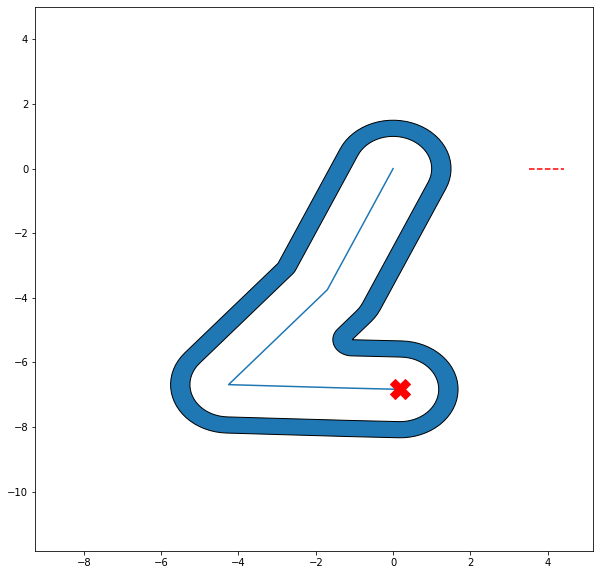

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


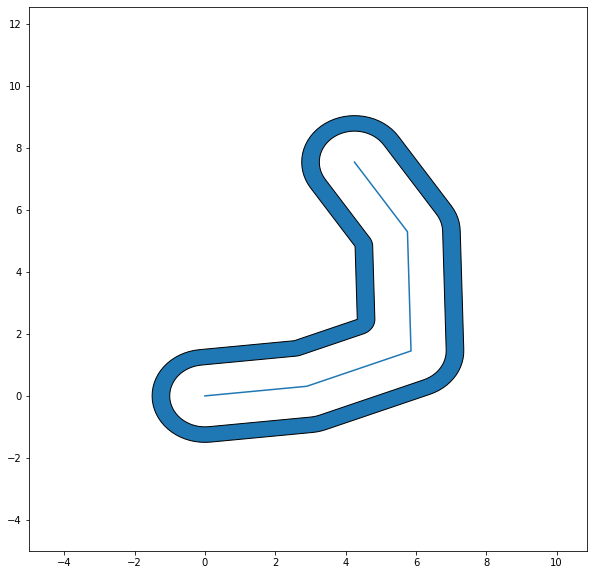

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 8.796375298298871 2.2265650827707364 -1
Observation: Distance | Angle | Sign: 8.836879785963859 1.7576144519094858 -1
Observation: Distance | Angle | Sign: 8.832208096318352 1.289610866537089 -1
Observation: Distance | Angle | Sign: 8.783346744715567 0.8201902494684079 -1
Observation: Distance | Angle | Sign: 8.700700129853784 0.34723204682844133 -1
Observation: Distance | Angle | Sign: 8.602233919639662 0.1307334616505238 1
Observation: Distance | Angle | Sign: 8.509978183504682 0.6141482515743872 1
Observation: Distance | Angle | Sign: 8.445218983789426 1.102190755751483 1
Observation: Distance | Angle | Sign: 8.423287093625422 1.592844984436618 1
Observation: Distance | Angle | Sign: 8.44944945009278 2.0833708090023717 1


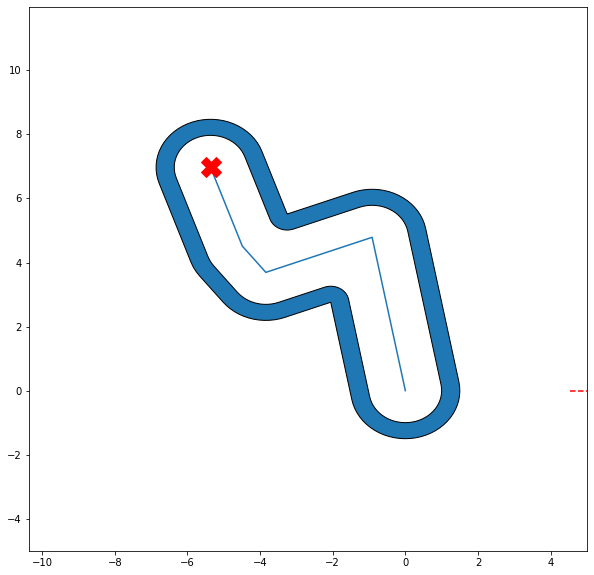

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


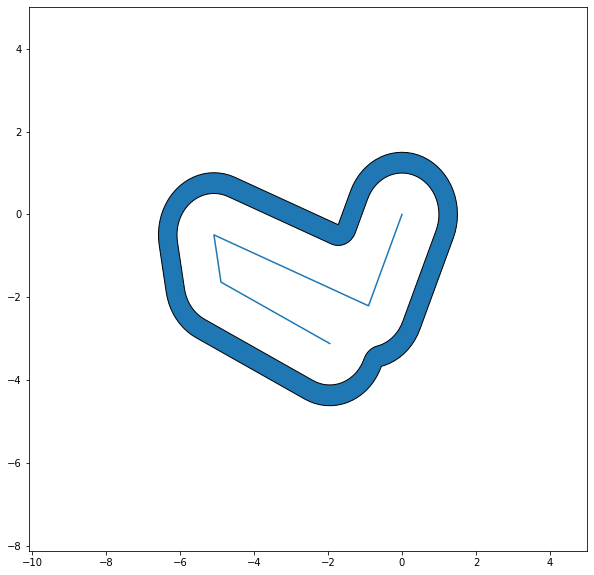

Position: ([], [], 0.0)
Observation: Distance | Angle | Sign: 4.895976108463399 3.13854743369758 1
Observation: Distance | Angle | Sign: 4.992317658708036 2.670085057027316 -1
Observation: Distance | Angle | Sign: 5.06777100782456 2.203639073437765 -1
Observation: Distance | Angle | Sign: 5.106543449829281 1.7423530873217787 -1
Observation: Distance | Angle | Sign: 5.100766399613188 1.282524839792674 -1
Observation: Distance | Angle | Sign: 5.0516019791868345 0.8202612370988334 -1
Observation: Distance | Angle | Sign: 4.96908666898607 0.35199352478216106 -1
Observation: Distance | Angle | Sign: 4.870678323839344 0.12492814479302261 -1
Observation: Distance | Angle | Sign: 4.77827100984247 0.6115204636635845 -1
Observation: Distance | Angle | Sign: 4.71357441380095 1.1065256335607359 -1


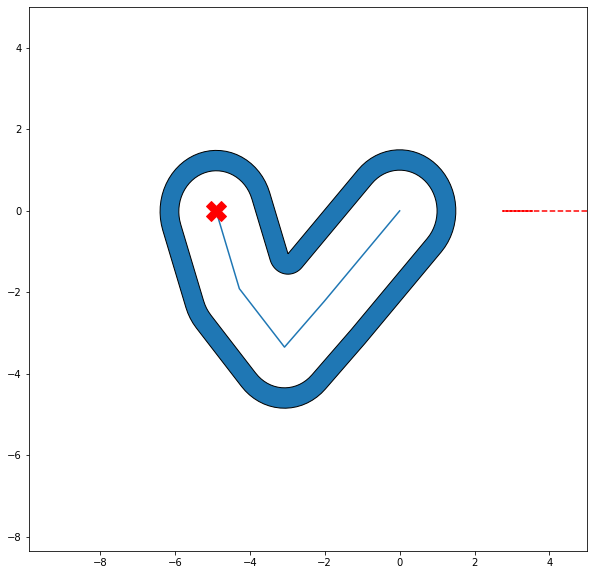

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
  10. mean training reward:  10.00, mean validation reward:  10.00, mean loss:  0.0000
done


In [35]:
# train policy network
velocity = 1
steering_angle = 0
theta = []
RP = []

try:
    training_rewards, losses = [], []
    print('start training')
    for i in range(num_episodes):
        x = []
        y = []
        rollout = []
        R = racetrack(num_turns,i)
        RacePlot, Goal = R.generate()
        P = python_env(num_turns,i)
        s = env.reset(i)
        R.generate(1)
#         print(Goal[-1])
#         RacePlot, Goal = R.generate()



# PLOT TRACK:

#         track = sg.LineString(Goal)
#         outer = track.buffer(1.5)
#         inner = outer.buffer(-0.5)
#         Track = outer - inner
        xs = [a[0] for a in Goal]
        ys = [a[1] for a in Goal]
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        ax.set_xlim(min(xs)-5,max(xs)+5)
        ax.set_ylim(min(ys)-5,max(ys)+5)
        ax.plot(xs, ys)
        ax.add_patch(PolygonPatch(RacePlot, alpha=1, zorder=2))
        print("Position:", (x,y,theta))


#         ss = s[0][:30]
#         print("\nThese are the states:\n", ss)
#         D = s[0][30:33]
#         print("\nThese are the distance, angle, sign:\n", D)
#         a = s[0][-2:]
#         print("\nThis is the action:\n", a)




        for j in range(rollout_limit):
            
            Dist,Angle,Sign = env.observe()
            print("Observation: Distance | Angle | Sign:",Dist, Angle, Sign)
            x1,y1,theta = P.kinematic(velocity, steering_angle)
            x.append(x1)
            y.append(y1)
            if closer(Angle, theta) == 1:
                steering_angle = theta

            if closer(Dist,x[j]) == 1:
                velocity = velocity+1
            else:
                velocity = velocity/2
            
#             if (j % 5) == 0:
#                 xR,yR = RacePlot.exterior.xy
#                 L1 = plt.plot(xR,yR)
#         L2 = plt.plot(x,y)
#         L3 = plt.plot(Goal[0],Goal[1])
#         plt.show()

        
            # generate rollout by iteratively evaluating the current policy on the environment
            with torch.no_grad():
                a_prob = policy(torch.from_numpy(np.atleast_2d(s)).float())
#                 print(a_prob)
            a = (np.cumsum(a_prob.numpy()) > np.random.rand()).argmax() # sample action
#             print(a)
            s1, r, done, _ = env.step([[a,a],[a,a]])
#             s1, r, done, _ = env.step(a_prob)
#             dist, phi, sign = env.observe()
#             print("Distance:", dist)
            rollout.append((s, a, r))
#             print(len(rollout[0]))
            s = s1
            if done: break
            
            
        L2 = ax.plot(x,y, 'r--')
        L3 = ax.plot(Goal[-1][0],Goal[-1][1], 'rX',markersize= 20)
        plt.show()    
        # prepare batch
        rollout = np.array(rollout)
#         print(np.shape(rollout[0][0]))
        states = np.vstack(rollout[:,0])
#         print(np.shape(states))
        actions = np.vstack(rollout[:,1])
#         print(np.shape(actions))
        rewards = np.array(rollout[:,2], dtype=float)
        print(rewards)
        returns = compute_returns(rewards, discount_factor)
        # policy gradient update
        policy.optimizer.zero_grad()
        a_probs = policy(torch.from_numpy(states).float()).gather(1, torch.from_numpy(actions)).view(-1)
        loss = policy.loss(a_probs, torch.from_numpy(returns).float())
        loss.backward()
        policy.optimizer.step()
        # bookkeeping
        training_rewards.append(sum(rewards))
        losses.append(loss.item())
        # print
        if (i+1) % val_freq == 0:
            # validation
            validation_rewards = []
            for _ in range(10):
                s = env.reset(i)
                reward = 0
                for _ in range(rollout_limit):
                    with torch.no_grad():
                        a = policy(torch.from_numpy(np.atleast_2d(s)).float()).argmax().item()
                    s, r, done, _ = env.step([[a,a],[a,a]])
                    reward += r
                    if done: break
                validation_rewards.append(reward)
            print('{:4d}. mean training reward: {:6.2f}, mean validation reward: {:6.2f}, mean loss: {:7.4f}'.format(i+1, np.mean(training_rewards[-val_freq:]), np.mean(validation_rewards), np.mean(losses[-val_freq:])))
    print('done')
except KeyboardInterrupt:
    print('interrupt')    

In [36]:
A = [[1,2,3,4],
    [5,6,7,8]]
# torch.tensor(X_train).float()
for i_episode in range(10):
    s = env.reset(5)
    print(torch.tensor(s).float())
    print(torch.tensor(s).float().argmax().item())
    for t in range(10):
#         action = A #env.observation_space.sample()
        a = policy(torch.from_numpy(np.atleast_2d(s)).float()).argmax().item()
#         a = policy(torch.from_numpy(np.atleast_2d(s))).argmax().item()
        print(a)
        s, r, done, _ = env.step(a)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
# env.step()
# env.reset()

tensor([[0.7689, 0.7413, 0.6971, 0.6227, 0.4817, 0.0000, 0.0000, 0.0000, 0.2036,
         0.5055, 0.6344, 0.7038, 0.7455, 0.7715, 0.7877, 0.7967, 0.8000, 0.8004,
         0.8002, 0.8003, 0.8004, 0.8002, 0.8003, 0.8004, 0.8002, 0.8003, 0.8003,
         0.8002, 0.8003, 0.8003, 2.4627, 0.6620, 1.0000, 0.0000, 0.0000]])
30
1


TypeError: 'int' object is not subscriptable

In [32]:
def get_user_input():
    
    Coord = input("Input relative coordinates: ")
    Dist = input("Input distances to the nearest objects: ")
    
    params = [Coord, Dist]
    if all(str(i).isdigit() for i in params):  # Check input is valid
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. The simulation will use default values:",
            "\n1 cashier, 1 server, 1 usher.",
        )
        params = [1, 1]
    return params

In [ ]:
# def main():
    
#     random.seed(42)
#     Coord, Dist = get_user_input()
    
    
    
    
#     env = simpy.env()
#     env.process(step(env, Coord, Dist))
#     env.run(until=90)
    
#     print(
#       "Running simulation...",
#     )
    
# if __name__ == '__main__':
#     main()